<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#4.1-NumPy的ndarray：一种多维数组对象" data-toc-modified-id="4.1-NumPy的ndarray：一种多维数组对象-1">4.1 NumPy的ndarray：一种多维数组对象</a></span><ul class="toc-item"><li><span><a href="#花式索引" data-toc-modified-id="花式索引-1.1">花式索引</a></span></li></ul></li><li><span><a href="#4.2-通用函数：快速的元素级数组函数" data-toc-modified-id="4.2-通用函数：快速的元素级数组函数-2">4.2 通用函数：快速的元素级数组函数</a></span></li><li><span><a href="#4.3-利用数组进行数据处理" data-toc-modified-id="4.3-利用数组进行数据处理-3">4.3 利用数组进行数据处理</a></span><ul class="toc-item"><li><span><a href="#数学和统计方法" data-toc-modified-id="数学和统计方法-3.1">数学和统计方法</a></span></li><li><span><a href="#用于布尔型数组的方法" data-toc-modified-id="用于布尔型数组的方法-3.2">用于布尔型数组的方法</a></span></li></ul></li><li><span><a href="#4.4-用于数组的文件输入输出" data-toc-modified-id="4.4-用于数组的文件输入输出-4">4.4 用于数组的文件输入输出</a></span></li><li><span><a href="#4.5-线性代数" data-toc-modified-id="4.5-线性代数-5">4.5 线性代数</a></span></li><li><span><a href="#4.6-伪随机数生成" data-toc-modified-id="4.6-伪随机数生成-6">4.6 伪随机数生成</a></span></li></ul></div>

# 第 4 章 NumPy 基础：数组和矢量计算

## 4.1 NumPy的ndarray：一种多维数组对象

跟列表最重要的区别在于，数组切片是原始数组的视图。这意味着数据不会被复制，视图上的任何修改都会直接反映到源数组上。

In [1]:
arr = np.arange(10)
arr_slice = arr[5:8]
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,     5, 12345,     7,     8,
           9])

In [2]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

如果你刚开始接触NumPy，可能会对此感到惊讶（尤其是当你曾经用过其他热衷于复制数组数据的编程语言）。由于NumPy的设计目的是处理大数据，所以你可以想象一下，假如NumPy坚持要将数据复制来复制去的话会产生何等的性能和内存问题。

> 注意：如果你想要得到的是ndarray切片的一份副本而非视图，就需要明确地进行复制操作，例如arr[5:8].copy()。

因此，可以对各个元素进行递归访问，但这样需要做的事情有点多。你可以传入一个以逗号隔开的索引列表来选取单个元素。也就是说，下面两种方式是等价的：

In [ ]:
arr2d[0][2]
arr2d[0, 2]

### 花式索引

花式索引（Fancy indexing）是一个NumPy术语，它指的是利用整数数组进行索引。假设我们有一个8×4数组：

## 4.2 通用函数：快速的元素级数组函数

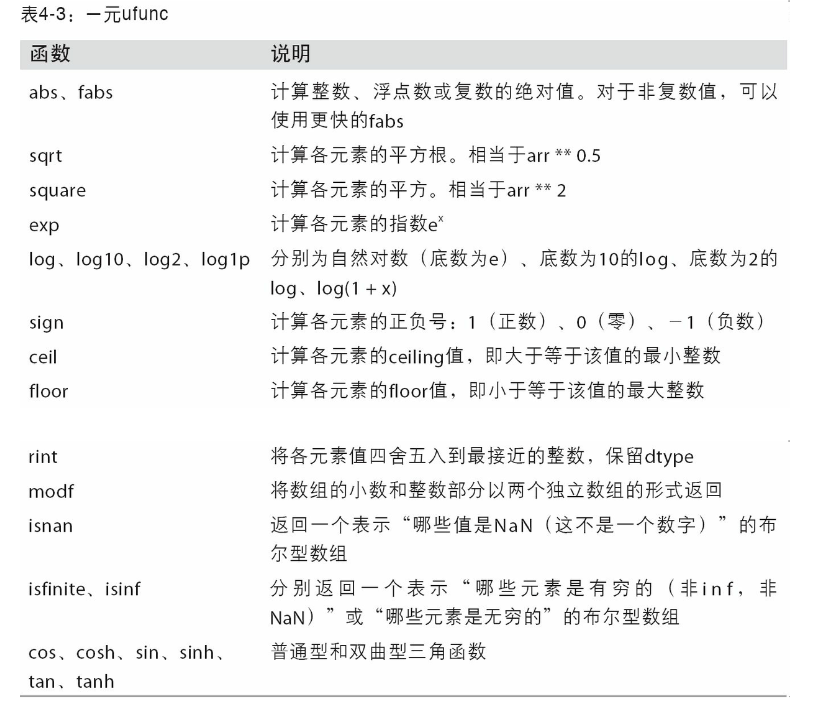

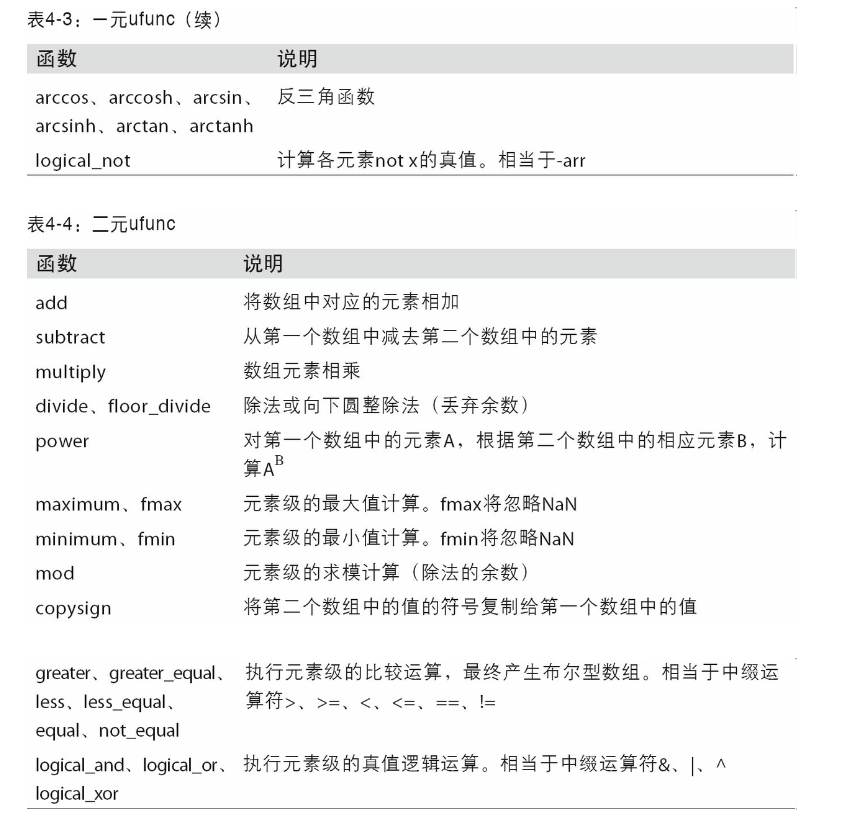

## 4.3 利用数组进行数据处理

NumPy数组使你可以将许多种数据处理任务表述为简洁的数组表达式（否则需要编写循环）。用数组表达式代替循环的做法，通常被称为矢量化。一般来说，矢量化数组运算要比等价的纯Python方式快上一两个数量级（甚至更多），尤其是各种数值计算。在后面内容中（见附录A）我将介绍广播，这是一种针对矢量化计算的强大手段。

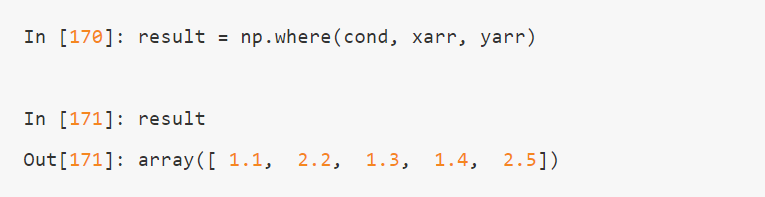

In [1]:
import numpy as np
arr = np.random.randn(4, 4)
arr > 0

array([[ True,  True, False, False],
       [False, False,  True,  True],
       [False, False, False, False],
       [False, False,  True, False]])

In [2]:
np.where(arr > 0, 2, -2)

array([[ 2,  2, -2, -2],
       [-2, -2,  2,  2],
       [-2, -2, -2, -2],
       [-2, -2,  2, -2]])

使用np.where，可以将标量和数组结合起来。例如，我可用常数2替换arr中所有正的值：

In [3]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[ 2.        ,  2.        , -0.62631768, -1.25248426],
       [-0.46569105, -0.8034087 ,  2.        ,  2.        ],
       [-1.00301714, -1.1848002 , -0.31044622, -0.54884106],
       [-0.5875034 , -0.67645551,  2.        , -1.87290892]])

### 数学和统计方法

可以通过数组上的一组数学函数对整个数组或某个轴向的数据进行统计计算。sum、mean以及标准差std等聚合计算（aggregation，通常叫做约简（reduction））既可以当做数组的实例方法调用，也可以当做顶级NumPy函数使用。

In [8]:
arr = np.random.randn(5, 4)
arr

array([[ 1.83869803,  0.84878337,  0.0318155 , -0.23543702],
       [ 0.06550505, -0.89783795,  0.1640473 , -0.82610967],
       [-0.56951075,  0.20580506,  0.1394696 ,  0.30470161],
       [-1.34870044, -0.34669271,  0.45344338, -0.24097604],
       [-0.50050564,  1.80450926,  0.04365439,  1.51278142]])

In [9]:
arr.mean()

0.12237218601691668

In [10]:
np.mean(arr)

0.12237218601691668

mean和sum这类的函数可以接受一个axis选项参数，用于计算该轴向上的统计值，最终结果是一个少一维的数组：

In [11]:
arr.mean(axis=1)

array([ 0.62096497, -0.37359882,  0.02011638, -0.37073145,  0.71510985])

In [12]:
arr.sum(axis=0)

array([-0.51451375,  1.61456702,  0.83243016,  0.5149603 ])

这里，arr.mean(1)是“计算行的平均值”，arr.sum(0)是“计算每列的和”。



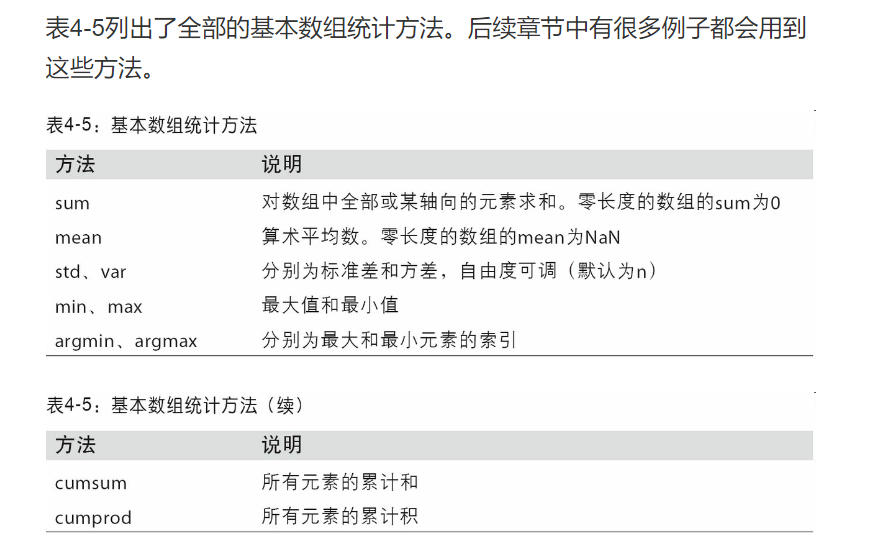

### 用于布尔型数组的方法

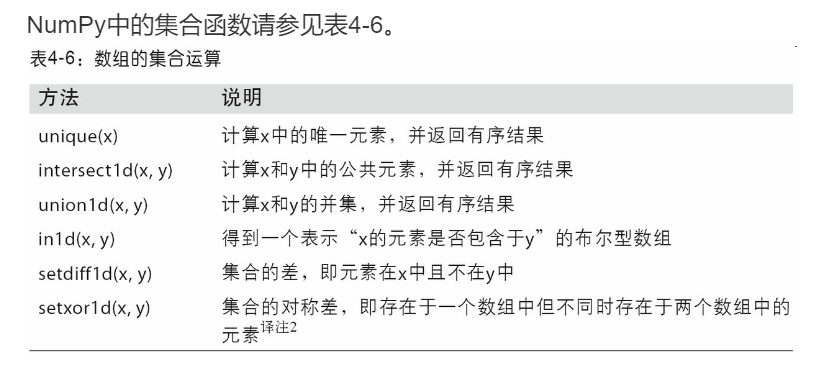

## 4.4 用于数组的文件输入输出

np.save和np.load是读写磁盘数组数据的两个主要函数。默认情况下，数组是以未压缩的原始二进制格式保存在扩展名为.npy的文件中的：

In [213]: arr = np.arange(10)

In [214]: np.save('some_array', arr)
如果文件路径末尾没有扩展名.npy，则该扩展名会被自动加上。然后就可以通过np.load读取磁盘上的数组：

In [215]: np.load('some_array.npy')
Out[215]: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
通过np.savez可以将多个数组保存到一个未压缩文件中，将数组以关键字参数的形式传入即可：

In [216]: np.savez('array_archive.npz', a=arr, b=arr)
加载.npz文件时，你会得到一个类似字典的对象，该对象会对各个数组进行延迟加载：

In [217]: arch = np.load('array_archive.npz')

In [218]: arch['b']
Out[218]: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
如果要将数据压缩，可以使用numpy.savez_compressed：

In [219]: np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

## 4.5 线性代数

## 4.6 伪随机数生成